In [1]:
%matplotlib inline

In [2]:
import grizli
from grizli import fitting, multifit, utils
utils.set_warnings()

# Show version (ignore warnings about paths)
print(grizli.__version__)

0.8.0-3-g647e9aa


In [3]:
# Test object
grism_object = 'j0224m0324_01750'

# URLs to the AWS buckets
field = '_'.join(grism_object.split('_')[:-1])
bucket = 'grizli-grism'
generic_url = 'https://s3.amazonaws.com/{0}/Pipeline/{1}/Extractions/{2}.beams.fits'

beams_url = generic_url.format(bucket, field, grism_object)
beams_file = '{0}.beams.fits'.format(grism_object)

In [4]:
# Download the beams file
import urllib.request
file_name, headers = urllib.request.urlretrieve(beams_url, filename=beams_file)

In [5]:
# MultiBeam object for fitting, etc.
mb = multifit.MultiBeam(beams_file, group_name=field, fcontam=0.2)

1 icca03qsq_flt.fits G102
2 icca03qkq_flt.fits G102
3 icca04tsq_flt.fits G102
4 icca03qlq_flt.fits G102
5 icca04tqq_flt.fits G102
6 icca03qqq_flt.fits G102
7 icca04tkq_flt.fits G102
8 icca04tlq_flt.fits G102


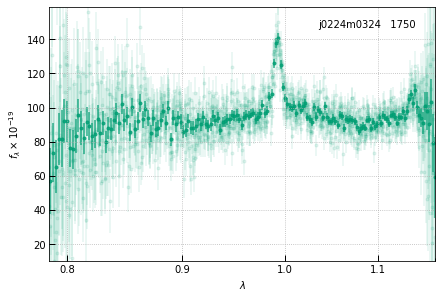

In [6]:
# 1D figure
fig = mb.oned_figure(bin=1, show_beams=True, units='flam')

In [7]:
# Continuum fit: `df` splines across the supplied wavelength region
import numpy as np
bsp = utils.bspline_templates(np.arange(7000,1.2e4,50), df=11)
tfit = mb.template_at_z(templates=bsp, z=0, fit_background=True)

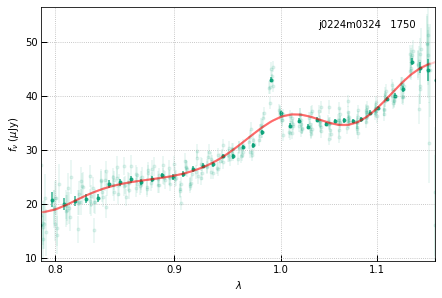

In [8]:
# 1D figure, units of micro Jy, binned, and with continnum
fig = mb.oned_figure(bin=4, show_beams=True, units='uJy', tfit=tfit)

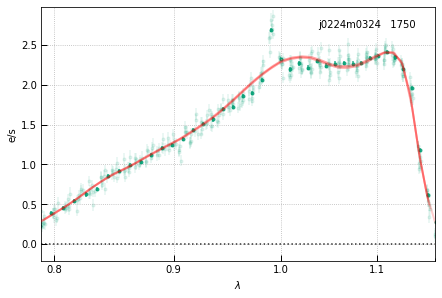

In [9]:
# 1D figure, detector units of electrons / s
fig = mb.oned_figure(bin=4, show_beams=True, tfit=tfit, units='eps')

(0.6666666666666666, 1.5)

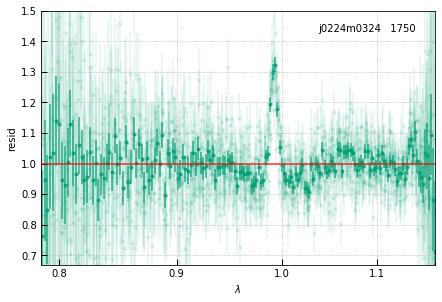

In [10]:
# 1D figure, normalized fit residuals
fig = mb.oned_figure(bin=1, show_beams=True, tfit=tfit, units='resid')
fig.axes[0].set_ylim(2./3, 3./2)